In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

# Results notebook

We have divided this notebook into the following parts:


In [2]:
OUTPUT_DIR = "../outputs"

# name of the dataset to preprocess
DATASET_NAME, SPLIT_NAME = "squad", "validation"
# DATASET_NAME, SPLIT_NAME = "narrativeqa", "test_5k_sample_seed_2022"
# DATASET_NAME, SPLIT_NAME = "newsqa", "dev"
# DATASET_NAME, SPLIT_NAME = ('squadshifts', 'new_wiki'), "test"
# DATASET_NAME, SPLIT_NAME = ('squadshifts', 'amazon'), "test"
# DATASET_NAME, SPLIT_NAME = ('squadshifts', 'reddit'), "test"
# DATASET_NAME, SPLIT_NAME = ('squadshifts', 'nyt'), "test"


IS_LOCAL_FS_DATASET = True \
    if (DATASET_NAME in ("newsqa", ) or SPLIT_NAME in ("test_5k_sample_seed_2022",)) \
    else False

if isinstance(DATASET_NAME, tuple):
    NORMALIZED_DATASET_NAME = "".join(DATASET_NAME)
else:
    NORMALIZED_DATASET_NAME = DATASET_NAME

BASE_FILENAME = f"{NORMALIZED_DATASET_NAME}_{SPLIT_NAME}"

ROOT_DIR = f"{OUTPUT_DIR}/results/{NORMALIZED_DATASET_NAME}/{SPLIT_NAME}"
EVALS_DIR = f"{ROOT_DIR}/evals"

# Tokenizer
TOKENIZER = "default"
# TOKENIZER = "spacy"
TOKENIZER_FILEPATH = f"{EVALS_DIR}/{BASE_FILENAME}_evals_{TOKENIZER}_config.yml"

# Instance-wise metrics for each prediction
EVALS_FILEPATH = f"{EVALS_DIR}/{BASE_FILENAME}_evals_{TOKENIZER}.csv.gz"

# ----------------------------------------
## Columns names
# ----------------------------------------
ID_COLS = ["example_id", "answer_id"]

UNIQUE_ID_COL = ID_COLS[0]
NON_UNIQUE_ID_COL = ID_COLS[1]
print("Using", UNIQUE_ID_COL, "as the unique column to de-duplicate the data")

evals = pd.read_csv(EVALS_FILEPATH)
evals_correct = evals[evals.exact_match == 1].drop(["first_error_position","metric_type"], axis=1)
evals_incorrect = evals[evals.exact_match != 1].drop(["metric_type"], axis=1)
assert evals_incorrect.first_error_position.isna().any() == False

evals.describe()

Using example_id as the unique column to de-duplicate the data


,exact_match,first_error_position,precision,recall,f1_score,csi,rouge1,rouge2,rougeL,rougeLsum,...,bleu_2,bleu_3,bleu_4,preds_raw_count,truncated,score_proba,score_proba_arithm,score_proba_std,score_proba_geom,score_proba_hmean
count,18005.000000,8973.000000,18005.000000,18005.000000,18005.000000,18005.000000,18005.000000,18005.000000,18005.000000,18005.000000,...,18005.000000,18005.000000,18005.000000,18005.000000,18005.0,18005.000000,18005.000000,18005.000000,18005.000000,18005.000000
mean,0.501638,0.561462,0.724312,0.742628,0.701171,0.654581,0.703481,0.434924,0.703059,0.703059,...,0.567372,0.322390,0.193579,5.316245,1.0,0.627740,0.912937,0.104526,0.900401,0.885565
std,0.500011,1.347847,0.395494,0.394745,0.380051,0.397975,0.378912,0.459119,0.379185,0.379185,...,0.481415,0.458269,0.387553,4.907098,0.0,0.264342,0.080638,0.076585,0.094554,0.111531
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.0,0.000008,0.222982,0.000000,0.217411,0.204678
25%,0.000000,0.000000,0.500000,0.500000,0.500000,0.333333,0.500000,0.000000,0.500000,0.500000,...,0.000000,0.000000,0.000000,2.000000,1.0,0.426877,0.881933,0.036582,0.861942,0.839120
50%,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.200000,1.000000,1.000000,...,1.000000,0.000000,0.000000,4.000000,1.0,0.651946,0.934391,0.096512,0.927213,0.918258
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,7.000000,1.0,0.867621,0.970870,0.159741,0.969300,0.967720
max,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,75.000000,1.0,0.999642,0.999843,0.433899,0.999843,0.999843


In [3]:
BASE_FILENAME

'squad_validation'

In [4]:
evals_correct.describe()

,exact_match,precision,recall,f1_score,csi,rouge1,rouge2,rougeL,rougeLsum,meteor,...,bleu_2,bleu_3,bleu_4,preds_raw_count,truncated,score_proba,score_proba_arithm,score_proba_std,score_proba_geom,score_proba_hmean
count,9032.0,9032.0,9032.0,9032.0,9032.0,9032.0,9032.000000,9032.0,9032.0,9032.000000,...,9032.000000,9032.000000,9032.000000,9032.000000,9032.0,9032.000000,9032.000000,9032.000000,9032.000000,9032.000000
mean,1.0,1.0,1.0,1.0,1.0,1.0,0.649469,1.0,1.0,0.799293,...,0.644043,0.339128,0.185120,4.246900,1.0,0.719193,0.931022,0.083508,0.922714,0.913082
std,0.0,0.0,0.0,0.0,0.0,0.0,0.477163,0.0,0.0,0.223518,...,0.478829,0.473439,0.388416,3.465275,0.0,0.227350,0.066159,0.069960,0.076234,0.088456
min,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,1.0,1.0,0.500000,...,0.000000,0.000000,0.000000,1.000000,1.0,0.016926,0.413355,0.000000,0.375471,0.270786
25%,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,1.0,1.0,0.500000,...,0.000000,0.000000,0.000000,2.000000,1.0,0.548522,0.901936,0.020940,0.889298,0.873802
50%,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,0.937500,...,1.000000,0.000000,0.000000,3.000000,1.0,0.768082,0.948822,0.067049,0.945200,0.941326
75%,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,0.981481,...,1.000000,1.000000,0.000000,5.000000,1.0,0.923860,0.980885,0.133067,0.980446,0.980036
max,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,0.999946,...,1.000000,1.000000,1.000000,44.000000,1.0,0.999642,0.999843,0.386721,0.999843,0.999843


In [25]:
evals_incorrect.describe()

,exact_match,first_error_position,precision,recall,f1_score,csi,rouge1,rouge2,rougeL,rougeLsum,...,bleu_2,bleu_3,bleu_4,preds_raw_count,truncated,score_proba,score_proba_arithm,score_proba_std,score_proba_geom,score_proba_hmean
count,8973.0,8973.000000,8973.000000,8973.000000,8973.000000,8973.000000,8973.000000,8973.000000,8973.000000,8973.000000,...,8973.000000,8973.000000,8973.000000,8973.000000,8973.0,8973.000000,8973.000000,8973.000000,8973.000000,8973.000000
mean,0.0,0.561462,0.446812,0.483563,0.400377,0.306891,0.405012,0.218969,0.404166,0.404166,...,0.490196,0.305543,0.202094,6.392622,1.0,0.535685,0.894733,0.125683,0.877942,0.857868
std,0.0,1.347847,0.400437,0.422947,0.330849,0.277154,0.332420,0.317538,0.332287,0.332287,...,0.471606,0.441860,0.386516,5.824371,0.0,0.267016,0.089342,0.077141,0.105287,0.124724
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.0,0.000008,0.222982,0.000000,0.217411,0.204678
25%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.000000,1.0,0.327518,0.860396,0.062587,0.834596,0.803001
50%,0.0,0.000000,0.500000,0.500000,0.500000,0.333333,0.500000,0.000000,0.500000,0.500000,...,0.500000,0.000000,0.000000,5.000000,1.0,0.527377,0.917720,0.121672,0.905857,0.891886
75%,0.0,1.000000,0.928571,1.000000,0.666667,0.500000,0.666667,0.500000,0.666667,0.666667,...,1.000000,1.000000,0.000000,8.000000,1.0,0.763636,0.956215,0.179918,0.952147,0.947624
max,0.0,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,75.000000,1.0,0.999642,0.999821,0.433899,0.999821,0.999821


In [26]:
def correlation_map(data, cols=None, figsize=(20,20)):
    div_cmap = sns.diverging_palette(220, 0, as_cmap=True) # DIVERGENT COLOR MAP
    if cols:
        data = data[cols]
    
    _data_corrs = data.corr()

    plt.figure(figsize=figsize)
    sns.heatmap(_data_corrs, mask=np.triu(_data_corrs), annot=True, vmin=-1.0, vmax=1, cmap=div_cmap)
    plt.show()

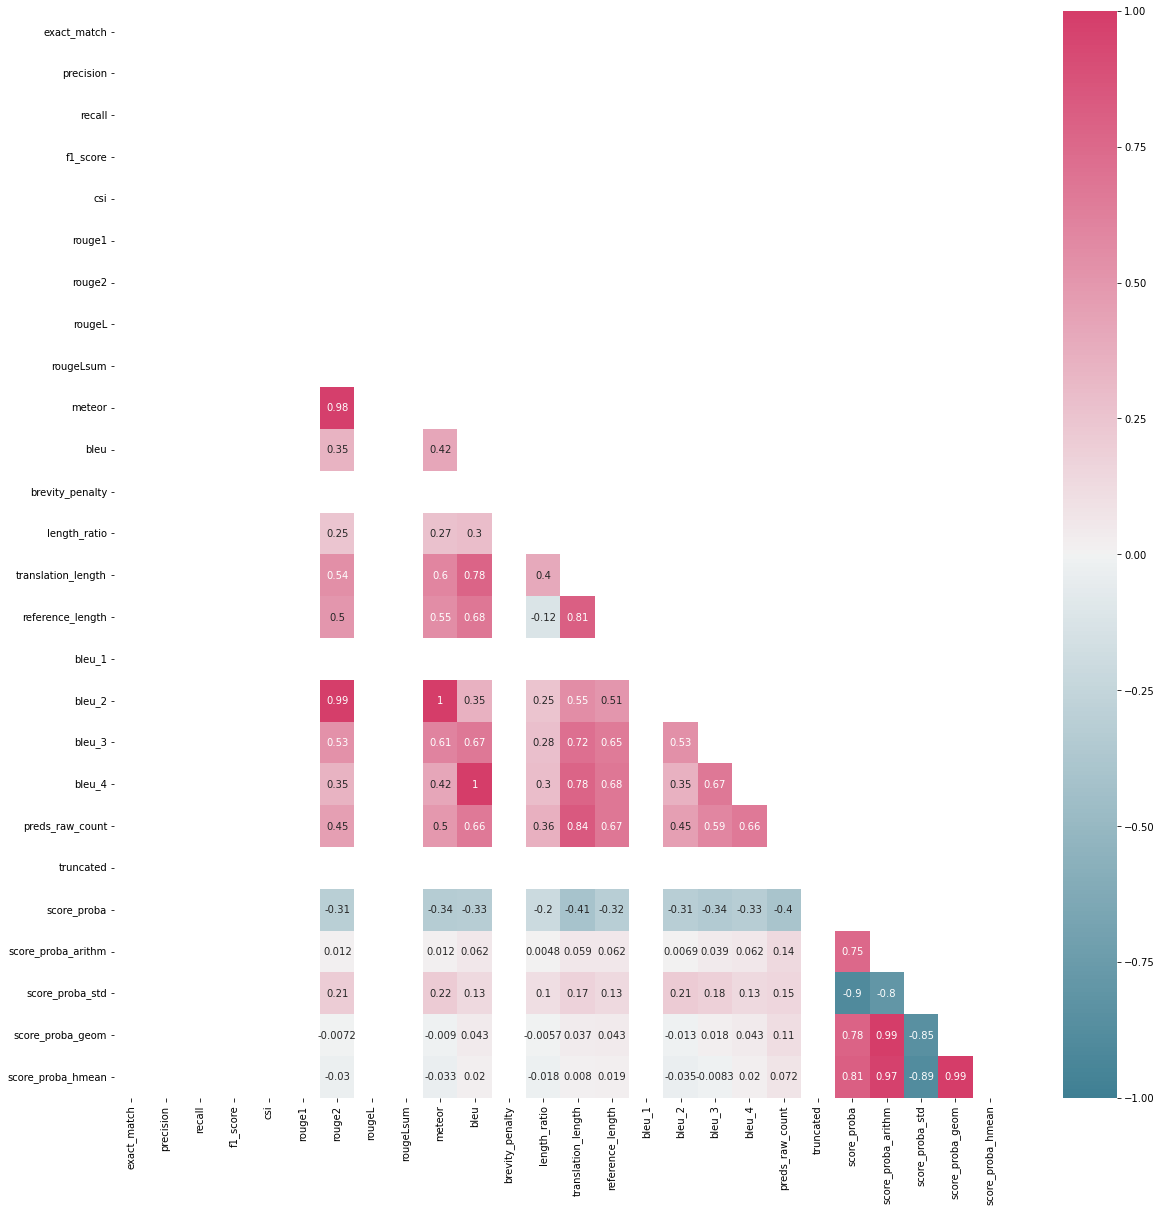

In [27]:
correlation_map(evals_correct)

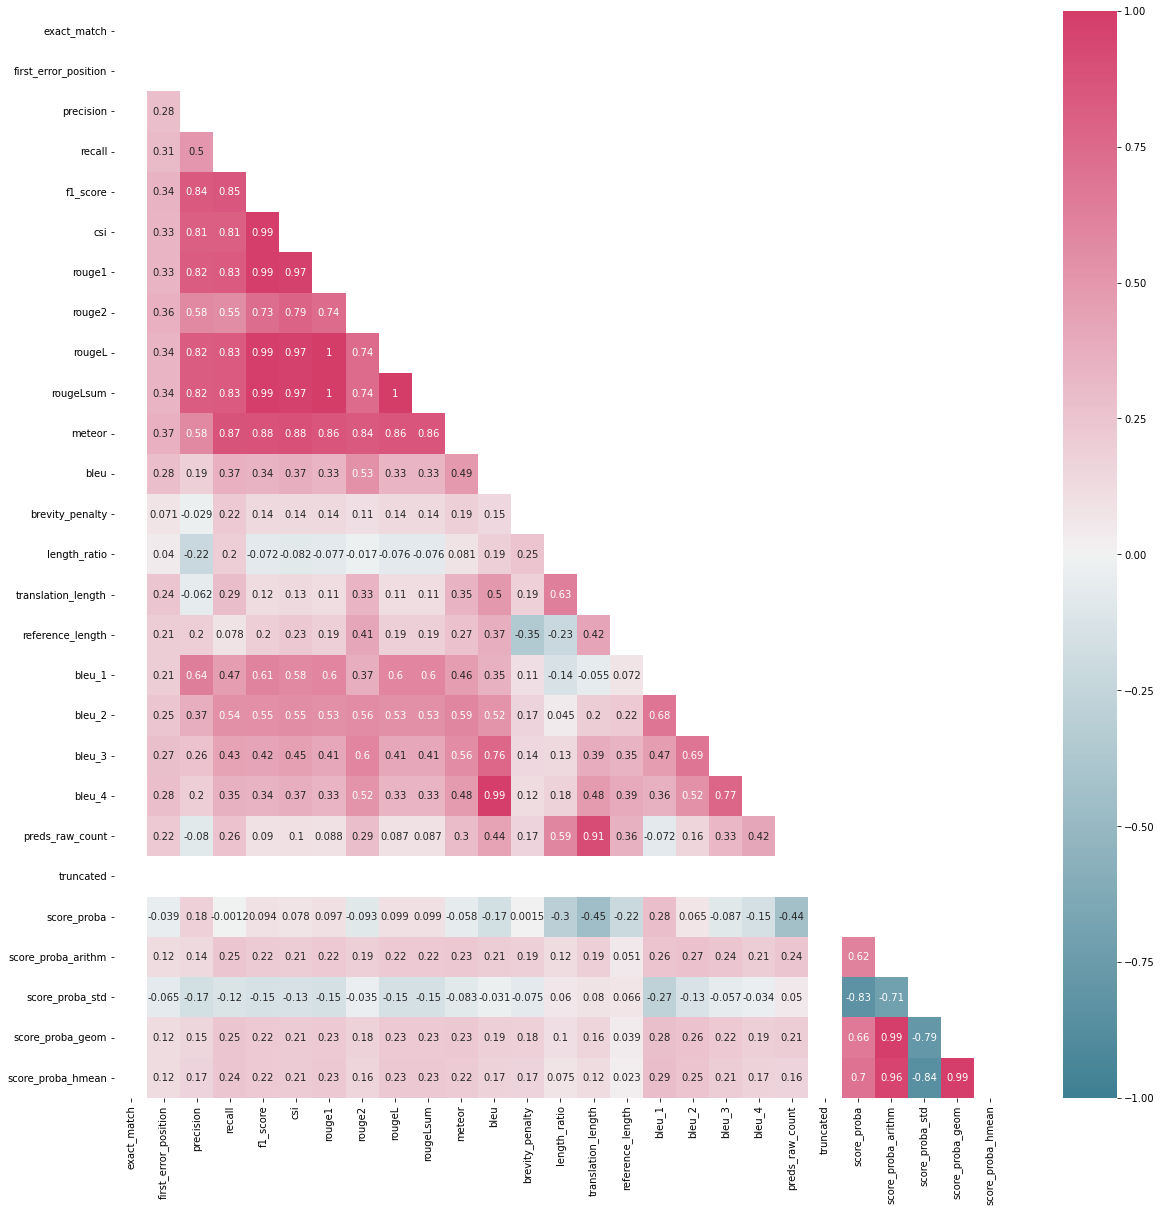

In [28]:
correlation_map(evals_incorrect)